___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [3]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,6]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder

# from scipy.stats import skew

# from sklearn.model_selection import cross_validate

In [276]:
## Ingest Data from links below and make a dataframe
soldiers_male = "https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr"
soldiers_female = "https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq"

In [277]:
df_male = pd.read_csv(soldiers_male, encoding= 'ISO-8859-1', low_memory=False)
df_female = pd.read_csv(soldiers_female, encoding= 'ISO-8859-1', low_memory=False)


In [278]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [279]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [280]:
df_male.shape, df_female.shape

((4082, 108), (1986, 108))

In [281]:
df_male.columns != df_female.columns, (df_male.columns != df_female.columns).sum()

(array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 1)

In [282]:
df_female.rename({'SubjectId':'subjectid'},axis = 1, inplace = True)

In [283]:
(df_male.columns != df_female.columns).sum()

0

In [284]:
df = df_male.append(df_female, ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [285]:
(df_male.shape[0] + df_female.shape[0]), df.shape

(6068, (6068, 108))

In [286]:
df.columns = df.columns.str.lower()

In [287]:
df.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


## Explore Data

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to writingpreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [289]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.0,20757.198418,13159.390894,10027.0,14841.75,20063.5,27234.50,920103.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


In [290]:
df.nunique().sort_values()

gender                               2
writingpreference                    3
branch                               3
component                            3
dodrace                              7
installation                        12
earprotrusion                       22
earbreadth                          22
heightin                            29
earlength                           36
bimalleolarbreadth                  37
handbreadth                         38
age                                 42
heelbreadth                         42
subjectnumericrace                  44
tragiontopofhead                    46
lateralmalleolusheight              47
headbreadth                         48
footbreadthhorizontal               49
palmlength                          50
bizygomaticbreadth                  50
headlength                          55
mentonsellionlength                 55
interpupillarybreadth               56
shoulderlength                      78
wristcircumference       

In [291]:
df.duplicated().sum()

0

In [292]:
df.isnull().sum().sort_values(ascending=False).head()

ethnicity               4647
subjectid                  0
radialestylionlength       0
thighcircumference         0
tenthribheight             0
dtype: int64

In [293]:
df.ethnicity.value_counts(dropna=False)

NaN                                                   4647
Mexican                                                357
Puerto Rican                                           183
Caribbean Islander                                     124
Filipino                                                67
Cherokee                                                65
Korean                                                  53
Dominican                                               32
Chinese                                                 26
Japanese                                                22
Vietnamese                                              21
Colombian                                               17
Cuban                                                   17
Arab or Middle Eastern                                  17
Salvadoran                                              16
East/Asian Indian                                       13
Samoan                                                  

In [294]:
df.dodrace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

In [295]:
df = df[["dodrace"]].join(df.drop(["dodrace"], axis=1))

In [296]:
df.corr().style.background_gradient(cmap='coolwarm')

In [297]:
(df.subjectnumericrace==df.dodrace).value_counts()

True     5262
False     806
dtype: int64

In [298]:
((df.subjectnumericrace==df.dodrace)>8).sum()

0

In [299]:
df[df["subjectnumericrace"]>8][["subjectnumericrace","dodrace"]]

,subjectnumericrace,dodrace
10,351,1
27,61,1
36,61,1
56,28,2
71,28,2
...,...,...
6033,231,2
6039,251,2
6040,31,3
6048,51,1


In [300]:
df.subjectnumericrace.unique()

array([    1,     2,   351,     3,    61,     4,    28,     5,    21,
          41,    31,   641,    23,     8,   251,    38,     6,    51,
          18,    64,   318,    63,    25,    43,   423,    35,   425,
         235,   358,    62,    42,   451,   238,  4251,   431,  2518,
         218,   231,   428,   651,   631,    48,  2351, 42351],
      dtype=int64)

In [301]:
df.subjectnumericrace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: subjectnumericrace, dtype: int64

**Drop columns**

In [302]:
drop_columns = ["subjectnumericrace",
                "subjectid",
                "date",
                "installation",
                "component",
                "branch",
                "primarymos",
                "subjectsbirthlocation",
                "ethnicity",
                "age",
                "writingpreference"]

In [303]:
df.drop(drop_columns, inplace=True, axis=1)

In [304]:
df.shape

(6068, 97)

In [305]:
df.isnull().sum().sort_values()

dodrace                           0
shoulderelbowlength               0
shouldercircumference             0
radialestylionlength              0
poplitealheight                   0
palmlength                        0
overheadfingertipreachsitting     0
neckcircumferencebase             0
neckcircumference                 0
mentonsellionlength               0
shoulderlength                    0
lowerthighcircumference           0
lateralfemoralepicondyleheight    0
kneeheightsitting                 0
kneeheightmidpatella              0
interscyeii                       0
interscyei                        0
interpupillarybreadth             0
iliocristaleheight                0
hipbreadthsitting                 0
hipbreadth                        0
lateralmalleolusheight            0
sittingheight                     0
sleevelengthspinewrist            0
sleeveoutseam                     0
gender                            0
wristheight                       0
wristcircumference          

### The Examination of Target Variable

In [306]:
df['dodrace'].describe()

count    6068.000000
mean        1.615030
std         0.979156
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: dodrace, dtype: float64

In [307]:
df['dodrace'].value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

In [308]:
# Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [309]:
df.drop(df[df['dodrace'] > 3].index, inplace = True)

In [310]:
df.shape

(5769, 97)

<AxesSubplot:ylabel='Frequency'>

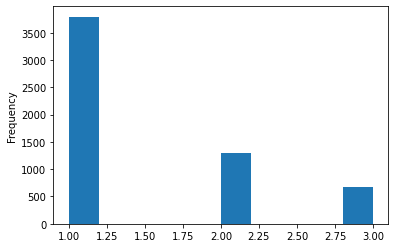

In [311]:
df['dodrace'].plot(kind='hist')

In [312]:
num_columns= df.drop(['dodrace'], axis=1).select_dtypes('number').columns

cat_columns = df.select_dtypes('object').columns

print(num_columns, end="\n\n")
print(cat_columns)

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

In [313]:
df["weightlbs"].describe()

count    5769.000000
mean      175.578263
std        33.600479
min         0.000000
25%       150.000000
50%       175.000000
75%       197.000000
max       321.000000
Name: weightlbs, dtype: float64

In [314]:
df["weightlbs"].value_counts().index.sort_values()

Int64Index([  0,  86,  88,  90,  95,  96,  98, 100, 101, 102,
            ...
            283, 285, 290, 292, 293, 295, 300, 310, 315, 321],
           dtype='int64', length=188)

In [315]:
df["weightkg"].describe()

count    5769.000000
mean      800.981106
std       155.990338
min       358.000000
25%       686.000000
50%       790.000000
75%       900.000000
max      1442.000000
Name: weightkg, dtype: float64

In [316]:
df["weightkg"].value_counts().index.sort_values()

Int64Index([ 358,  393,  400,  428,  430,  431,  432,  435,  442,  444,
            ...
            1345, 1346, 1354, 1369, 1371, 1375, 1400, 1413, 1429, 1442],
           dtype='int64', length=774)

In [317]:
df.drop("weightlbs", inplace=True, axis=1)
# "weightlbs" sütununda hatalı veriler var. bu nedenle düşüldü.

In [318]:
df["gender"].value_counts()

Male      3899
Female    1870
Name: gender, dtype: int64

In [319]:
print(df.groupby('gender')['dodrace'].mean().sort_values())

gender
Male      1.390357
Female    1.606417
Name: dodrace, dtype: float64


### Multicorrelation

In [320]:
def color_red(val):
    
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [321]:
df.corr().style.applymap(color_red)

,dodrace,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight


In [322]:
def multi_corr(dataset, corr_num):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= corr_num) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [323]:
df_multi = df.copy()

In [324]:
multi_corr(df, 0.9)

In [325]:
df.shape

(5769, 60)

In [326]:
df.corr().style.background_gradient(cmap='coolwarm')

,dodrace,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,calfcircumference,chestbreadth,chestcircumference,chestdepth,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,forearmcenterofgriplength,functionalleglength,handbreadth,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadthsitting,interpupillarybreadth,interscyei,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,overheadfingertipreachsitting,palmlength,shoulderlength,sleevelengthspinewrist,thighclearance,thumbtipreach,tragiontopofhead,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistfrontlengthsitting,wristcircumference
dodrace,1.000000,-0.031860,-0.217393,-0.158561,-0.157784,-0.111249,-0.059867,-0.113701,-0.031438,-0.203874,-0.070197,-0.107319,0.083263,-0.024195,0.032559,-0.025066,-0.001344,-0.098933,-0.066708,-0.091895,-0.155248,-0.082658,-0.026500,-0.117393,-0.141253,-0.064213,-0.089557,-0.097392,-0.227899,-0.319669,-0.033631,-0.123926,-0.158999,-0.026917,-0.008958,0.009739,-0.110228,-0.071767,0.166804,-0.013892,0.194548,-0.122464,-0.094265,-0.218440,-0.003629,-0.018517,-0.099779,-0.169650,0.001644,-0.077721,-0.123570,-0.000570,-0.065669,-0.050268,-0.196206,-0.208262,-0.125099,-0.160391,-0.174408
abdominalextensiondepthsitting,-0.031860,1.000000,0.351934,0.312919,0.518896,0.456729,0.332593,0.417617,0.691126,0.505856,0.724344,0.366155,0.530905,0.626294,0.519677,0.739481,0.840828,0.245897,0.476406,0.658512,0.627868,0.825830,0.778442,0.463251,0.199866,0.242192,0.403525,0.139829,0.264128,0.279748,0.345895,0.415260,0.419302,0.301289,0.361741,0.363256,0.329280,0.502539,0.437203,0.554712,0.258762,0.599371,0.220816,0.348377,0.674410,0.294322,0.656883,0.321105,0.310547,0.187664,0.422614,0.724702,0.389444,0.186359,0.728538,0.572029,0.858962,0.579494,0.546947
acromialheight,-0.217393,0.351934,1.000000,0.868267,0.504673,0.693952,0.797793,0.733288,0.522740,0.401588,0.628490,0.705043,0.570168,0.583928,0.506695,0.283092,0.341796,0.866969,0.811402,0.409358,0.542611,0.530689,0.280813,0.341983,0.410726,0.358753,0.439740,0.278063,0.292532,0.813617,0.846525,0.893985,0.708512,0.752909,0.406551,0.431756,0.548384,0.797380,0.447876,0.100192,0.337712,0.526440,0.856497,0.677825,0.327282,0.539904,0.627926,0.867356,0.709205,0.542223,0.872367,0.445248,0.803680,0.327485,0.733662,0.727869,0.438562,0.607020,0.733564
acromionradialelength,-0.158561,0.312919,0.868267,1.000000,0.416051,0.604208,0.725966,0.667377,0.452499,0.343457,0.559916,0.614830,0.519596,0.514486,0.456070,0.247027,0.292016,0.814136,0.775389,0.354909,0.466411,0.470349,0.265916,0.247204,0.306636,0.311002,0.370492,0.233762,-0.004899,0.639168,0.818087,0.820203,0.623868,0.719796,0.354258,0.389691,0.483084,0.709314,0.438903,0.084485,0.339989,0.469476,0.812201,0.554542,0.284450,0.474985,0.546312,0.791049,0.665143,0.513675,0.871455,0.381574,0.800831,0.292337,0.581830,0.609591,0.373562,0.480876,0.642518
anklecircumference,-0.157784,0.518896,0.504673,0.416051,1.000000,0.709550,0.561528,0.536816,0.637641,0.450363,0.641173,0.692289,0.520441,0.531773,0.504460,0.566075,0.577262,0.355277,0.500172,0.817155,0.559538,0.612861,0.485644,0.462831,0.377611,0.215021,0.368176,0.236413,0.309829,0.512839,0.450956,0.513469,0.573359,0.452816,0.404192,0.430723,0.434334,0.729474,0.527910,0.405767,0.240565,0.510409,0.380395,0.487776,0.697103,0.402623,0.574447,0.503830,0.451054,0.351436,0.543386,0.648125,0.457384,0.295599,0.665049,0.510452,0.585273,0.482198,0.697485
balloffootcircumference,-0.111249,0.456729,0.693952,0.604208,0.709550,1.000000,0.744905,0.735577,0.662673,0.33

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   dodrace                         5769 non-null   int64 
 1   abdominalextensiondepthsitting  5769 non-null   int64 
 2   acromialheight                  5769 non-null   int64 
 3   acromionradialelength           5769 non-null   int64 
 4   anklecircumference              5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

In [328]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df['gender'])
df_multi['gender'] = encoder.fit_transform(df_multi['gender'])

In [329]:
X = df.drop("dodrace", axis=1)
y = df["dodrace"]

### Train / Test and Split

In [330]:
from sklearn.model_selection import train_test_split

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Scaling

In [332]:
df.describe()

,dodrace,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,calfcircumference,chestbreadth,chestcircumference,chestdepth,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,forearmcenterofgriplength,functionalleglength,handbreadth,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadthsitting,interpupillarybreadth,interscyei,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,overheadfingertipreachsitting,palmlength,shoulderlength,sleevelengthspinewrist,thighclearance,thumbtipreach,tragiontopofhead,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistfrontlengthsitting,wristcircumference,gender
count,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.00000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000
mean,1.460392,247.254290,1408.630265,328.071590,225.201768,244.408043,195.118911,399.706015,341.663027,274.903449,491.454845,72.335413,324.962212,306.677760,139.529381,1022.059456,242.234356,872.112845,610.449991,386.316519,283.232623,1024.206622,252.322586,622.693708,351.880222,35.175420,62.606171,22.227249,240.553302,786.399203,339.458832,1104.347201,85.098111,189.574796,152.043682,570.424337,196.640839,333.274918,70.834113,386.417923,632.534928,412.773964,484.316693,69.76183,406.943144,119.601664,376.127578,1390.525048,114.106604,145.202288,868.361068,176.696481,791.044548,129.580343,1632.470966,460.990293,318.409950,377.352054,169.308372,0.675854
std,0.695637,37.457748,78.303123,20.444554,15.965783,16.803556,13.379000,30.124094,41.270615,19.239580,42.011888,5.326965,17.050426,20.818789,7.248670,75.952953,26.409001,54.064846,33.120828,30.577787,20.612214,100.375776,26.660255,45.087220,29.807293,3.221118,4.861629,3.149012,28.595503,41.843182,23.081597,67.719289,6.320915,11.422521,6.176650,18.245395,8.322907,22.260663,5.932530,32.273943,36.644621,42.868488,28.977173,7.24541,33.098625,7.860484,39.724315,85.519035,7.105352,12.394681,56.904175,16.124405,53.486543,6.635641,98.204399,36.706353,36.395675,31.714316,13.060900,0.468096
min,1.000000,155.000000,1146.000000,249.000000,156.000000,186.000000,151.000000,283.000000,216.000000,197.000000,357.000000,55.000000,267.000000,245.000000,116.000000,737.000000,168.000000,656.000000,479.000000,266.000000,213.000000,695.000000,170.000000,473.000000,243.000000,25.000000,46.000000,13.000000,138.000000,654.000000,258.000000,835.000000,67.000000,150.000000,131.000000,502.000000,168.000000,258.000000,48.000000,280.000000,510.000000,270.000000,352.000000,43.00000,290.000000,91.000000,275.000000,1111.000000,92.000000,107.000000,636.000000,121.000000,602.000000,105.000000,1342.000000,345.000000,211.000000,289.000000,124.000000,0.000000
25%,1.000000,220.000000,1353.000000,314.000000,214.000000,233.000000,186.000000,377.000000,312.000000,262.000000,461.000000,68.000000,314.000000,292.000000,134.000000,970.000000,223.000000,834.000000,587.000000,365.000000,269.000000,952.000000,234.000000,592.000000,331.000000,33.0000

In [333]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [334]:
scaler = MinMaxScaler()

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

### Logistic Model GridsearchCV

## 2. SVC

### Vanilla SVC model 

###  SVC Model GridsearchCV

## 3. RF

### Vanilla RF Model

### RF Model GridsearchCV

## 4. XGBoost

### Vanilla XGBoost Model

### XGBoost Model GridsearchCV

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [335]:
!pip install imblearn

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [336]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'imblearn'

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7376215262514891

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

(1, 232)


In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___